# 3.4. Especificación de la deformación en otras direcciones (2D)

|Quién | Fecha | Qué hizo |
| ---  | ---   | ---      |
|Michael Heredia Pérez, <mherediap@unal.edu.co> | Julio 16, 2022 | Conversión de código de MAXIMA a Python |
|Juan Nicolás Ramírez, <jnramirezg@unal.edu.co> | Septiembre 24, 2022 | Simplificando y adecuando código |
|Michael Heredia Pérez, <mherediap@unal.edu.co> | Octubre 7, 2022 | Añadiendo sistemas matriciales |
|Diego Andrés Alvarez Marín, <daalvarez@unal.edu.co> | Marzo 7, 2024 | Mejorando los comentarios |

$$
\newcommand{\ve}[1]{{\vec{\boldsymbol{#1}}}}
\newcommand{\ma}[1]{{\boldsymbol{#1}}}
\newcommand{\hve}[1]{{\,\hat{\!\boldsymbol{#1}}}}
\newcommand{\tr}{\operatorname{tr}}
$$

In [1]:
from sympy import sin, cos, init_printing, latex, symbols, Matrix, trigsimp, expand, linear_eq_to_matrix, expand_trig

# Para imprimir bonito
init_printing()
from IPython.display import Math                 
def imprimir (texto1, variable, texto2=""):
    return Math(texto1 +  rf'{latex(variable)}' + texto2)

Se definen las variables simbólicas necesarias:


In [2]:
ex, ey, exy, t = symbols("varepsilon_x, varepsilon_y, varepsilon_xy, theta")

Se especifica la matriz de transformación, $\ma{T}$:

In [3]:
T = Matrix([[cos(t), -sin(t),   0],
            [sin(t),  cos(t),   0],
            [     0,       0,   1]])
imprimir(r"\ma{T} = ", T)

<IPython.core.display.Math object>

Se especifica la matriz de deformaciones $\ma{\varepsilon}$ definida con respecto a la base dada por $\big\{\hve{i}, \hve{j}, \hve{k}\big\} = \big\{\hve{e}_1, \hve{e}_2, \hve{e}_3\big\}$:

In [4]:
epsilon = Matrix([[ ex, exy,  0],
                  [exy,  ey,  0],
                  [  0,   0,  0]])

imprimir(r"\ma{\varepsilon} = ", epsilon)

<IPython.core.display.Math object>

Se calcula la matriz de deformaciones $\ma{\varepsilon}'$ definida con respecto a la base dada por $\big\{\hve{e}_1, \hve{e}_2, \hve{e}_3\big\}$, utilizando la ecuación $$\ma{\varepsilon}' = \ma{T}^T\ma{\varepsilon}\ma{T}$$ así:

In [5]:
epsilonP = trigsimp(T.T*epsilon*T)

imprimir(r"\ma{\varepsilon}' = ", epsilonP)

<IPython.core.display.Math object>

Se extraen las expresiones de interés de la matriz $\ma{\varepsilon}'$:

In [6]:
exp   = expand(epsilonP[0,0])
eyp   = expand(epsilonP[1,1])
expyp = expand(epsilonP[0,1])

In [7]:
imprimir(r"\varepsilon_{x'}(\theta) = ", exp)

<IPython.core.display.Math object>

In [8]:
imprimir(r"\varepsilon_{y'}(\theta) = ", eyp)

<IPython.core.display.Math object>

In [9]:
imprimir(r"\varepsilon_{x'y'}(\theta) = ", expyp)

<IPython.core.display.Math object>

## Representación matricial

### Deformaciones matemáticas

Las ecuaciones obtenidas anteriormente, esto es $\varepsilon_{x'}$, $\varepsilon_{y'}$ y $\varepsilon_{x'y'}$, definen las deformaciones longitudinales en los ejes $x'$, $y'$ y angulares en los planos $x'y'$, desde la perspectiva matemática. Estas se pueden reorganizar en un sistema matricial de la forma:

$$\begin{bmatrix}
\varepsilon_{x'} \\ 
\varepsilon_{y'}\\ 
\varepsilon_{x'y'} 
\end{bmatrix} = 
\ma{T}_{\ma{\sigma},2D} 
\begin{bmatrix}
\varepsilon_{x} \\ \varepsilon_{y}\\ \varepsilon_{xy} 
\end{bmatrix}$$

In [10]:
Tsigma_2d = linear_eq_to_matrix([exp, eyp, expyp], (ex, ey, exy))[0]

imprimir(r"\ma{T}_{\ma{\sigma},2D} = ", Tsigma_2d)

<IPython.core.display.Math object>

Para que esta matriz de transformación conincida con la vista en clase, debemos aplicar simplificaciones a las relaciones trigonométricas de ángulos dobles con la función ```expand_trig()``` y simplificando trigonométricamente con la función ```trigsimp()```:

In [11]:
Tsigma_2d = expand_trig(trigsimp(Tsigma_2d))
imprimir(r"\ma{T}_{\ma{\sigma},2D} = ", Tsigma_2d)

<IPython.core.display.Math object>

Sabiendo que

$$2\text{cos}^2\theta-1 = \text{cos}^2\theta-\text{sin}^2\theta$$

### Deformaciones ingenieriles

Recordando la relación que existe entre las deformaciones matemáticas $\varepsilon_{xy}$ e ingenieriles $\gamma_{xy}$

$$\varepsilon_{xy} = \frac{1}{2}\gamma_{xy}$$

procedemos a calcular el siguiente sistema matricial:

$$
\begin{bmatrix}
\varepsilon_{x'} \\ 
\varepsilon_{y'}\\ 
\gamma_{x'y'} 
\end{bmatrix} = 
\ma{T}_{\ma{\varepsilon},2D} 
\begin{bmatrix}
\varepsilon_{x} \\ \varepsilon_{y}\\ \gamma_{xy} 
\end{bmatrix}.
$$

Para ello, definimos simbólicamente a $\gamma_{xy}$ y aplicamos el método ```.subs()``` para reemplazar la igualdad anterior.

In [12]:
gxy = symbols("gamma_xy")

# i de deformaciones ingenieriles
exp_i =     exp.subs(exy, gxy/2)
eyp_i =     eyp.subs(exy, gxy/2)
gxpyp = 2*expyp.subs(exy, gxy/2)

In [13]:
imprimir(r"\varepsilon_{x'}(\theta) = ", exp_i)

<IPython.core.display.Math object>

In [14]:
imprimir(r"\varepsilon_{y'}(\theta) = ", eyp_i)

<IPython.core.display.Math object>

In [15]:
imprimir(r"\gamma_{x'y'}(\theta) = ", gxpyp)

<IPython.core.display.Math object>

In [16]:
# Buscamos el sistema matricial.
Tepsilon_2d = linear_eq_to_matrix([exp_i, eyp_i, gxpyp], (ex, ey, gxy))[0]

# Simplificamos las expresiones algebŕaicas como en el caso anterior
Tepsilon_2d = expand_trig(trigsimp(Tepsilon_2d))
imprimir(r"\boldsymbol{T_{\underline{\underline{\varepsilon}},2D}} = ", Tepsilon_2d)

<IPython.core.display.Math object>

Sabiendo que

$$\cos 2\theta = 2\text{cos}^2\theta-1 = \text{cos}^2\theta-\text{sin}^2\theta$$

### Identidades

Verifiquemos que $\ma{T}_{\ma{\sigma},2D}^{-1} = \ma{T}_{\ma{\varepsilon},2D}^T$:

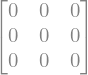

In [17]:
trigsimp(Tsigma_2d**-1 - Tepsilon_2d.T)

Verifiquemos que $\ma{T}_{\ma{\varepsilon},2D}^{-1} = \ma{T}_{\ma{\sigma},2D}^T$:

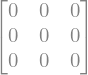

In [18]:
trigsimp(Tepsilon_2d.inv() - Tsigma_2d.T)  #M.inv() es lo mismo que M**-1